# Customer booking data

### Loading and inspecting
Import the necessary packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Load the customer_booking data in a DataFrame named `bookings` and show the first 5 rows to inspect the DataFrame.

In [2]:
bookings = pd.read_csv('customer_booking.csv')
print(bookings.head())

   Unnamed: 0  num_passengers sales_channel  trip_type  purchase_lead  \
0           0               2      Internet  RoundTrip            262   
1           1               1      Internet  RoundTrip            112   
2           2               2      Internet  RoundTrip            243   
3           3               1      Internet  RoundTrip             96   
4           4               2      Internet  RoundTrip             68   

   length_of_stay  flight_hour flight_day   route booking_origin  \
0              19            7        Sat  AKLDEL    New Zealand   
1              20            3        Sat  AKLDEL    New Zealand   
2              22           17        Wed  AKLDEL          India   
3              31            4        Sat  AKLDEL    New Zealand   
4              22           15        Wed  AKLDEL          India   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1         

**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

### Completed bookings

Create a new dataframe named `completed_bookings`:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [3]:
# Select relevant columns and filter for completed bookings
completed_bookings = bookings.loc[
    bookings['booking_complete'] == 1,
    ['num_passengers', 'purchase_lead', 'length_of_stay', 'booking_origin', 'flight_duration', 'booking_complete']
]
print(completed_bookings.head())

     num_passengers  purchase_lead  length_of_stay booking_origin  \
82                1             15              31       Malaysia   
86                1            156              19       Malaysia   
94                1            181              87      Singapore   
109               1            127              17       Malaysia   
122               1             42              17       Malaysia   

     flight_duration  booking_complete  
82              8.83                 1  
86              8.83                 1  
94              8.83                 1  
109             8.83                 1  
122             8.83                 1  


#### Average purchase lead

Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [4]:
avg_purchase_lead = completed_bookings.groupby('booking_origin')['purchase_lead'].mean().sort_values()
print(avg_purchase_lead)

booking_origin
Czech Republic            3.000000
Vanuatu                  11.000000
Sweden                   12.600000
Bahrain                  16.000000
Greece                   16.000000
Kenya                    19.000000
Kuwait                   23.500000
Oman                     24.666667
United Arab Emirates     36.000000
Laos                     40.166667
Taiwan                   49.093750
Russia                   53.666667
Brunei                   53.951220
Spain                    55.000000
Pakistan                 55.000000
Cambodia                 55.250000
Seychelles               56.000000
Romania                  56.000000
Saudi Arabia             58.909091
Mexico                   59.000000
Macau                    59.147368
Vietnam                  59.315789
Australia                59.986667
Myanmar (Burma)          62.000000
(not set)                62.000000
United Kingdom           63.142857
Japan                    65.554393
Mauritius                66.750000
Franc

Display the average amount of days between booking date and flight date of Australia.

In [11]:
australia_avg_lead = avg_purchase_lead.loc['Australia']
print(f"Average purchase lead for Australia: {australia_avg_lead:.2f} days")

Average purchase lead for Australia: 59.99 days


## Purchase lead histogram
Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

**step 1** find the 5 countries with the most bookings and store them in a variable `countries`.

In [12]:
countries = bookings['booking_origin'].value_counts().head(5).index.tolist()
print(countries)

['Australia', 'Malaysia', 'South Korea', 'Japan', 'China']


**step 2** Create a barplot for every country. Ensure you use appropriate labels and a legend.

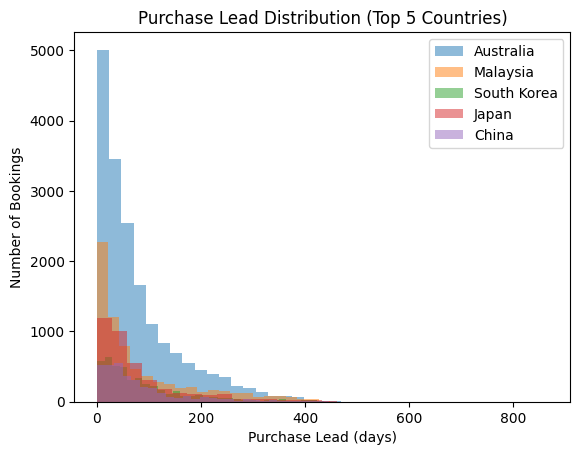

In [13]:
for country in countries:
    subset = bookings[bookings['booking_origin'] == country]
    plt.hist(subset['purchase_lead'], bins=30, alpha=0.5, label=country)
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Number of Bookings')
plt.title('Purchase Lead Distribution (Top 5 Countries)')
plt.legend()
plt.show()

The graph above is not really practical. First of all,  all the bins are very small so it is hard to read. Besides, bars with the same x-value are drawn on top of each other. This causes some bars to be invisible. Furthermore, we have a wide x-axis range with just a few data points above 500.
Let's try to make a cleaner graph.

## Try again
**Assignment**
Make a new histogram (bar plot) of the categorical purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads categories on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.
### Categorizing purchase leads

Let's first categorize the purchase leads using following categories:
purchase lead
* more than 365 days before departure --> early bird
* 365 days or less in advance but more than 183 days in advance --> planner
* Booked more than 90 days prior to departure but at most 183 prior to departure --> seasonal booker
* Booked at most 90 days in advance --> late booker
* less than 2 weeks in advance --> last minute


Add a new column "purchase_lead_category" in the completed_bookings dataframe containing the corresponding categories.

In [14]:
def categorize_lead(days):
    if days < 14:
        return 'last minute'
    elif days <= 90:
        return 'late booker'
    elif days <= 183:
        return 'seasonal booker'
    elif days <= 365:
        return 'planner'
    else:
        return 'early bird'

completed_bookings['purchase_lead_category'] = completed_bookings['purchase_lead'].apply(categorize_lead)

Store the distinct categories in a variable named `pl_categories`, ordered from "last minute" to "early bird".

In [15]:
pl_categories = ['last minute', 'late booker', 'seasonal booker', 'planner', 'early bird']

### Distinct dataframe top 5 
Create a new dataframe `top_df` containing the data of the top 5 countries with the most bookings.

Tip: use the variable `countries`which you already made.

In [16]:
top_df = completed_bookings[completed_bookings['booking_origin'].isin(countries)]

Display the total amount of purchase leads in every purchase_lead_category per country. Store this in a variable.

In [17]:
lead_counts = top_df.groupby(['booking_origin', 'purchase_lead_category']).size().unstack(fill_value=0)[pl_categories]
print(lead_counts)

purchase_lead_category  last minute  late booker  seasonal booker  planner  \
booking_origin                                                               
Australia                       219          502              114       61   
China                            83          402              140       66   
Japan                            95          286               62       31   
Malaysia                        512         1148              408      354   
South Korea                      75          245               79       51   

purchase_lead_category  early bird  
booking_origin                      
Australia                        4  
China                            3  
Japan                            4  
Malaysia                        46  
South Korea                     12  


### Grouped bar plot
We want to display the data for every country using grouped bar charts. In order to evenly display the bars, we have to set the locations of our bars.



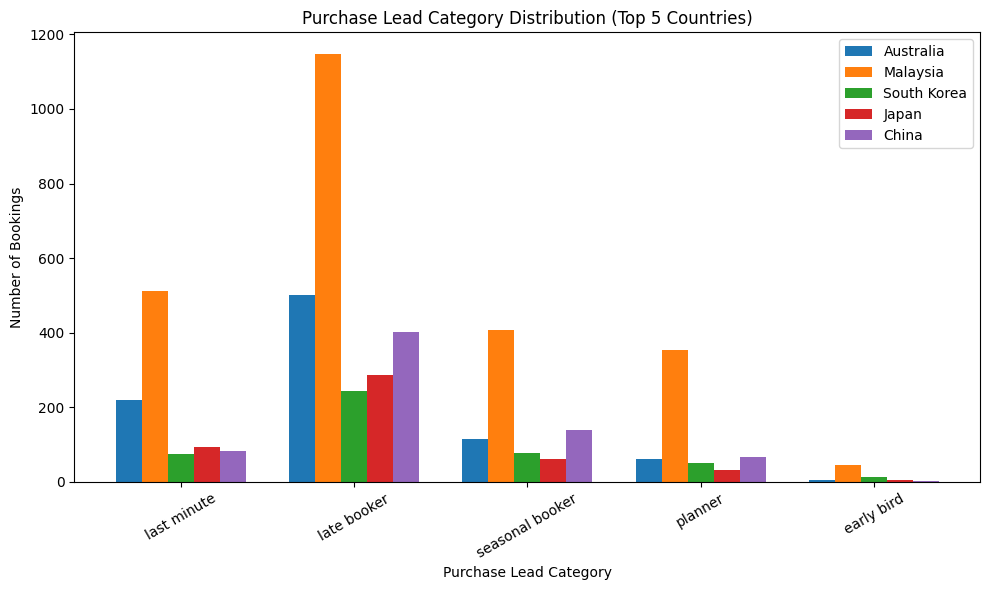

In [22]:
import numpy as np

x = np.arange(len(pl_categories))
width = 0.15

fig, ax = plt.subplots(figsize=(10,6))
for i, country in enumerate(countries):
    counts = lead_counts.loc[country]
    ax.bar(x + i*width, counts, width, label=country)

ax.set_xlabel('Purchase Lead Category')
ax.set_ylabel('Number of Bookings')
ax.set_title('Purchase Lead Category Distribution (Top 5 Countries)')
ax.set_xticks(x + width*2)
ax.set_xticklabels(pl_categories, rotation=30)
ax.legend()
plt.tight_layout()
plt.show()

Now it is time for you to draw the plot. Keep in mind
* Bars cannot overlap
* The order of countries is preserved (meaning the order of countries is the same for all categories)
* The order of the x value categories should be the same as the order stored in the list `pl_categories`
* Ensure the counts per country are plotted in the right category (the order on the x-axis might not be the same as the order in your dataset)
* Provide labels and a legend
* Rotate the x-axis labels to make them readable

The image `PurchaseLeadCat_top5.png` displays the expected plot.

## Bookings

For the questions below, work with the `bookings` dataframe.

* Remove bookings with missing values
* Create a new column `duration_cat` indicating whether a flight is "Short", "Medium" or "Long" distance. Short distance flights take at most 3 hours, long distance flights take more than 6 hours.
* Create a new column `premium_customer`. A customer is a premium customer if they want extra baggage, preferred seating and in-flight meals. 


* Display summary statistics
* What percentage of bookings are completed vs incomplete?
* Which sales channel has the highest percentage of completion?
* What percentage of long distance travellers who completed their booking are premium customers? (You do not need to take into account the amount of travellers per booking.)
* What are the top 5 most popular routes based on the number of passengers?
* Display the average flight duration per country

In [5]:
# Summary statistics
bookings_clean = bookings.dropna()
print(bookings_clean.describe(include='all'))

          Unnamed: 0  num_passengers sales_channel  trip_type  purchase_lead  \
count   50000.000000    50000.000000         50000      50000   50000.000000   
unique           NaN             NaN             2          3            NaN   
top              NaN             NaN      Internet  RoundTrip            NaN   
freq             NaN             NaN         44382      49497            NaN   
mean    24999.500000        1.591240           NaN        NaN      84.940480   
std     14433.901067        1.020165           NaN        NaN      90.451378   
min         0.000000        1.000000           NaN        NaN       0.000000   
25%     12499.750000        1.000000           NaN        NaN      21.000000   
50%     24999.500000        1.000000           NaN        NaN      51.000000   
75%     37499.250000        2.000000           NaN        NaN     115.000000   
max     49999.000000        9.000000           NaN        NaN     867.000000   

        length_of_stay  flight_hour fli

In [6]:
# Percentage completed vs incomplete
completed_pct = bookings_clean['booking_complete'].value_counts(normalize=True) * 100
print(completed_pct)

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


In [7]:
# Percentage of completion per sales channel
completion_by_channel = bookings_clean.groupby('sales_channel')['booking_complete'].mean() * 100
print(completion_by_channel)

sales_channel
Internet    15.476995
Mobile      10.840157
Name: booking_complete, dtype: float64


In [8]:
# Premium customers long distance
# Add premium_customer column
bookings_clean['premium_customer'] = (
    bookings_clean['wants_extra_baggage'] &
    bookings_clean['wants_preferred_seat'] &
    bookings_clean['wants_in_flight_meals']
)

# Add duration_cat column
bookings_clean['duration_cat'] = pd.cut(
    bookings_clean['flight_duration'],
    bins=[-float('inf'), 3, 6, float('inf')],
    labels=['Short', 'Medium', 'Long']
)

# Filter for long distance and completed bookings
long_completed = bookings_clean[
    (bookings_clean['duration_cat'] == 'Long') &
    (bookings_clean['booking_complete'] == 1)
]

pct_premium = long_completed['premium_customer'].mean() * 100
print(f"{pct_premium:.2f}%")

24.73%


In [9]:
# Top 5 routes
top_routes = bookings_clean.groupby('route')['num_passengers'].sum().sort_values(ascending=False).head(5)
print(top_routes)

route
AKLKUL    4450
PENTPE    1566
DMKKIX    1428
ICNSIN    1335
MELSGN    1230
Name: num_passengers, dtype: int64


In [10]:
# Flight duration
avg_duration_country = bookings_clean.groupby('booking_origin')['flight_duration'].mean()
print(avg_duration_country)

booking_origin
(not set)               6.649762
Afghanistan             4.750000
Algeria                 6.620000
Argentina               7.576667
Australia               7.968687
                          ...   
United Arab Emirates    7.699048
United Kingdom          7.450809
United States           6.883487
Vanuatu                 8.580000
Vietnam                 7.993789
Name: flight_duration, Length: 104, dtype: float64
